In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
newest_sample_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
newest_sample_date

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date = dt.datetime(2017,8,23) - dt.timedelta(days=365)
last_year_date 


datetime.datetime(2016, 8, 23, 0, 0)

In [20]:
# Perform a query to retrieve the data and precipitation scores
sel=[measurement.date, measurement.prcp]
last_year = session.query(*sel).\
    filter(measurement.date > dt.datetime(2016,8,22)).\
    order_by(measurement.date).all()


In [22]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame (last_year, columns = ['date', 'precipitation'])
df.head

# Sort the dataframe by date

<bound method NDFrame.head of             date  precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

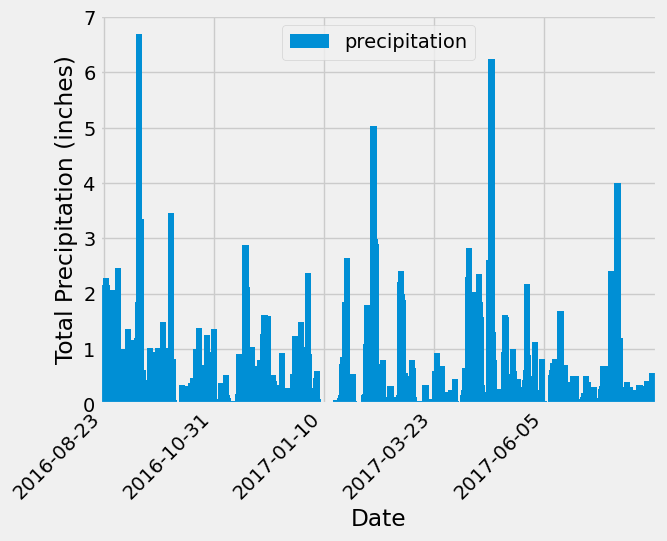

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(x='date', y='precipitation', width=25)

# limit the number of x-axis labels and make them diagonal
plt.locator_params(axis='x', nbins = 5)
plt.xticks(rotation=45, ha='right')

#add chart title and labels
plt.xlabel('Date')
plt.ylabel('Total Precipitation (inches)')
plt.legend()

#show the plot
plt.show

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, func.count(measurement.station)]
station_activity = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station,
       func.min(measurement.tobs),
       func.avg(measurement.tobs),
       func.max(measurement.tobs)]

temp_values = session.query(*sel).\
    filter(measurement.station == 'USC00519281').all()

print(f"Station: {temp_values[0][0]}")
print(f"Lowest Temp was:  {temp_values[0][1]}\u00b0F ")
print(f"Average Temp was: {temp_values[0][2]}\u00b0F ")
print(f"Highest Temp was: {temp_values[0][3]}\u00b0F ")

Station: USC00519281
Lowest Temp was:  54.0°F 
Average Temp was: 71.66378066378067°F 
Highest Temp was: 85.0°F 


In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[measurement.date, measurement.tobs, measurement.station]
last_year = session.query(*sel).\
    filter(measurement.date > dt.datetime(2016,8,22)).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()

In [32]:
#Sort the dataframe by date
df = pd.DataFrame (last_year, columns = ['date', 'temperature', 'station'])
df.head()

,date,temperature,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281


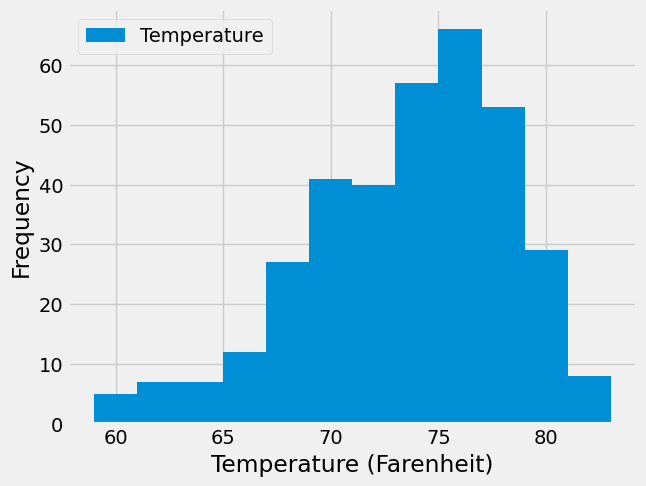

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data in a histogram
plt.hist(df['temperature'], bins = 12)
plt.tight_layout()

# Add titles and labels
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Frequency')
legend_label = ['Temperature']
plt.legend(legend_label)

# show the plot
plt.show()

# Close Session

In [34]:
# Close Session
session.close()